In [76]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import seaborn

# Accuracies

In [206]:

accuracies = list(pathlib.Path(".").glob("*accuracy.npy"))
acc_names = [x.name.split("_")[0].title() for x in accuracies]
accuracies = [np.load(x) for x in accuracies]

In [207]:
acc_df = pd.DataFrame(accuracies, index=acc_names, columns=["Accuracy"]).T.sort_index()
acc_df

,Lava,Norse
Accuracy,0.981507,0.9811


In [210]:
print(acc_df.to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrr}
\toprule
 & Lava & Norse \\
\midrule
Accuracy & 0.982 & 0.981 \\
\bottomrule
\end{tabular}



# Confusion matrix

In [179]:
activities = [str(x.name) for x in pathlib.Path(".").glob("*activity.npy")]
activities.sort()
names = [x.split("_")[0] for x in activities]
activities = [np.load(str(p)) for p in activities]
names

['Lava', 'Norse', 'snnTorch']

In [205]:
metric = torch.nn.CosineSimilarity(0)
divs = pd.DataFrame(index=names).sort_index()
for i in range(len(activities)):
  act_row = []
  for i_col in range(len(activities)):
    dist = metric(torch.tensor(activities[i]).flatten(0), torch.tensor(activities[i_col]).flatten(0))
    print(dist.shape)
    act_row.append(dist.item())
  divs[names[i]] = act_row
divs

torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])


,Lava,Norse,snnTorch
Lava,1.000000,0.999980,0.135047
Norse,0.999980,1.000000,0.135047
snnTorch,0.135047,0.135047,1.000000


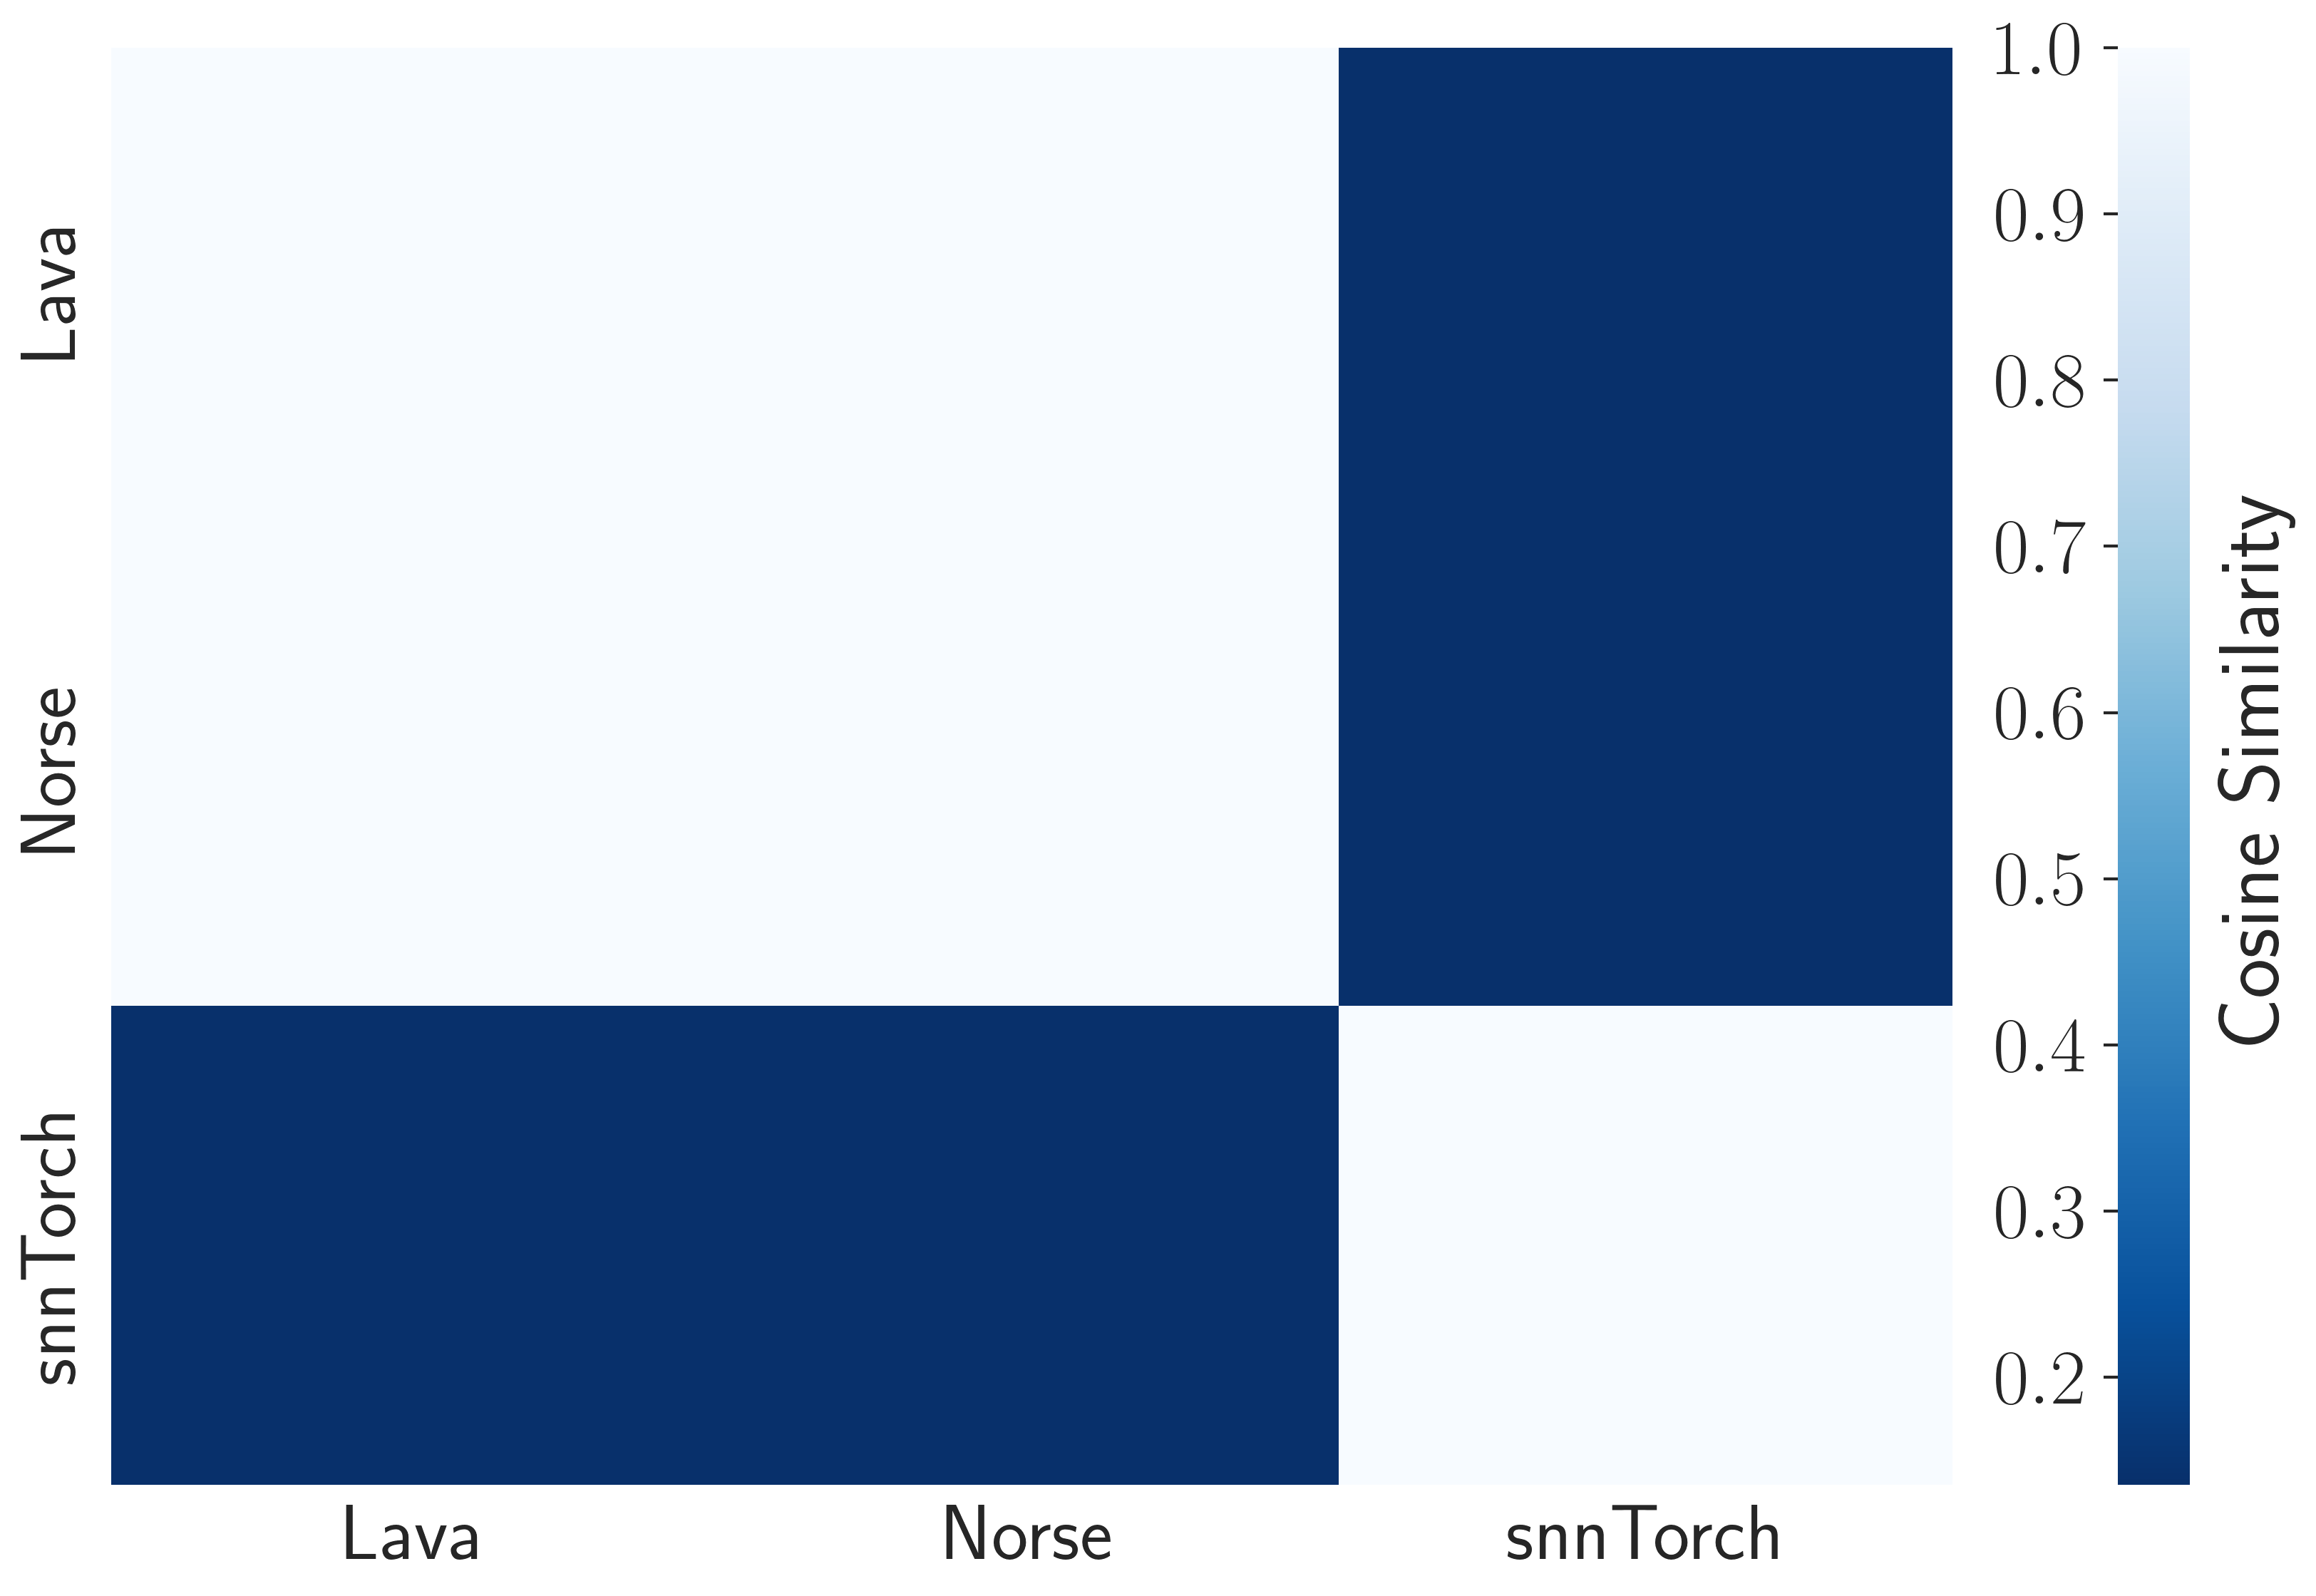

In [332]:
plt.style.use("../plots.mplstyle")
seaborn.set_context("paper", font_scale=3)
seaborn.set_style("whitegrid")

f, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=300)
seaborn.heatmap(divs.abs(), ax=ax, cmap="Blues_r", cbar_kws={"pad": 0.07})
ax.collections[0].colorbar.set_label("Cosine Similarity", labelpad=10)
ax.collections[0].colorbar.ax.yaxis.set_ticks_position("left")
ax.collections[0].colorbar.ax.tick_params(pad=5)
f.savefig("../figures/conv_confusion.pdf", bbox_inches="tight")

# Plot digit input

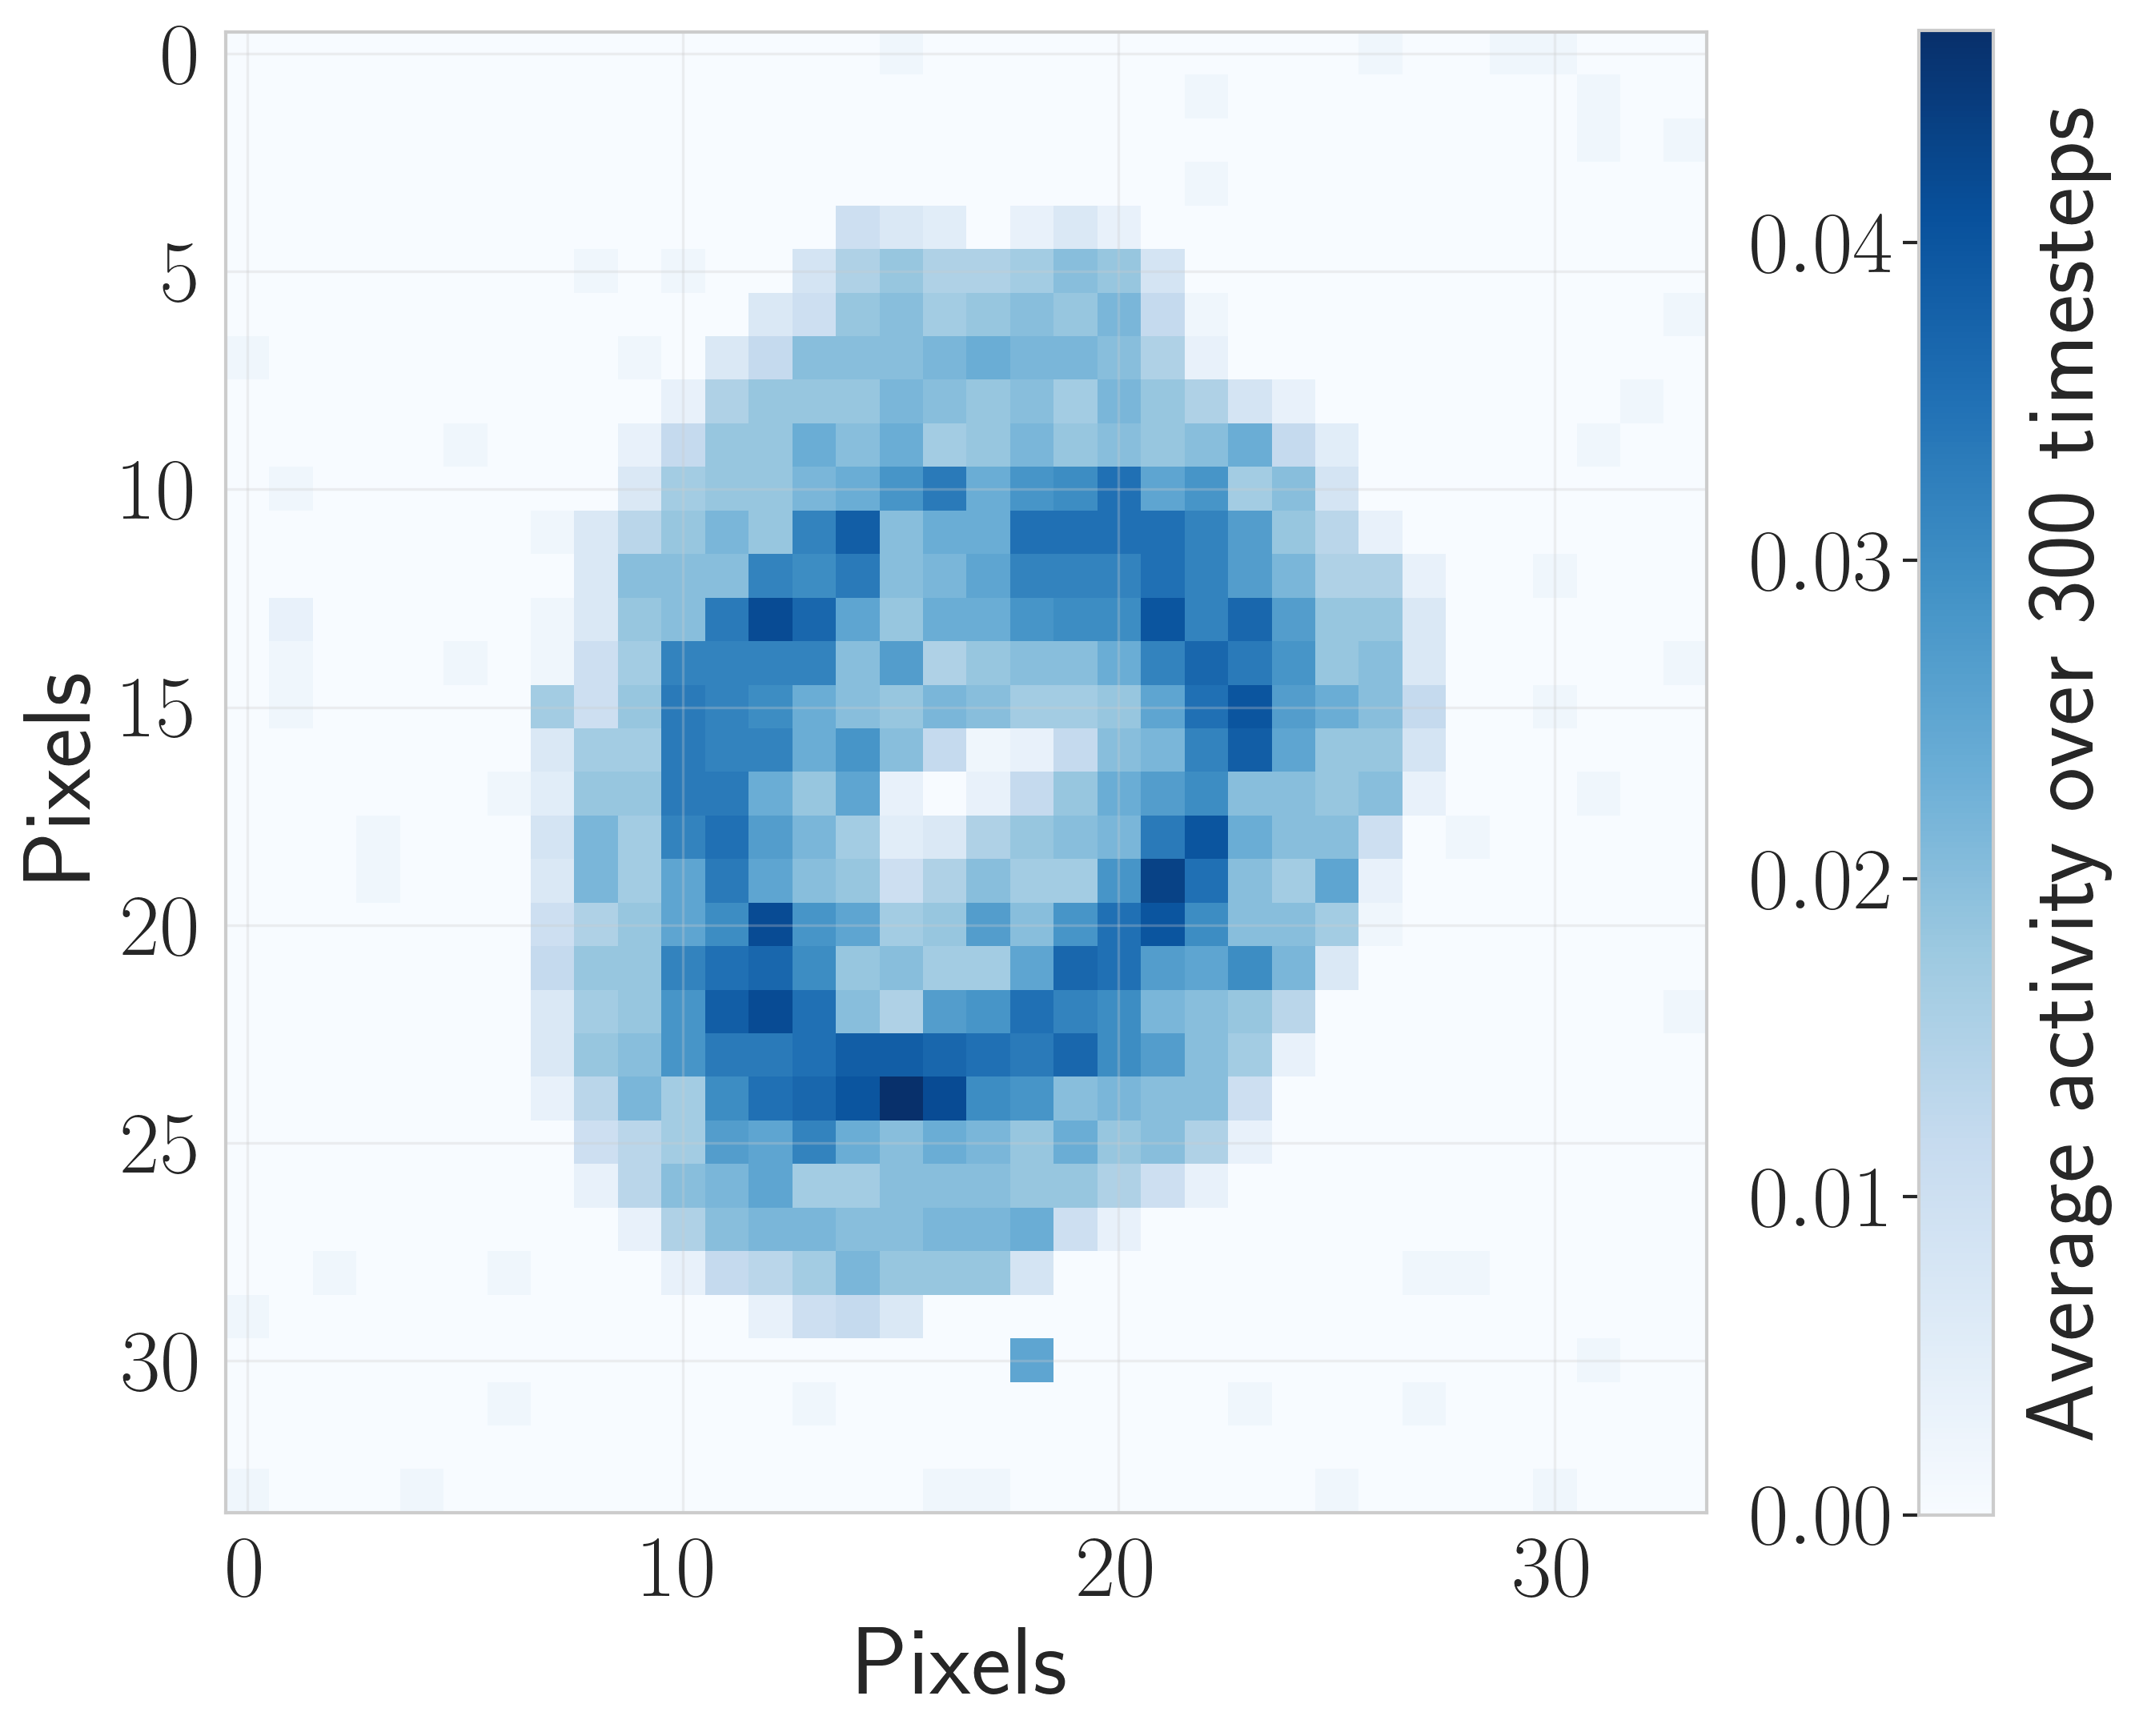

In [339]:
f, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
cax = ax.imshow(np.load("val_numbers.npy").mean(0)[0].mean(0), cmap="Blues")
cbar = f.colorbar(cax, fraction=0.042, pad=0.12)
cbar.ax.yaxis.set_ticks_position('left')
cbar.set_label("Average activity over 300 timesteps", labelpad=10)
ax.set_xlabel("Pixels")
ax.set_ylabel("Pixels")
f.savefig("../figures/nmnist_zero.pdf", bbox_inches="tight")